In [24]:
from pathlib import Path

import matplotlib.pyplot as plt
import pydicom
# %load_ext nb_black

In [25]:
# Handle 2D images
dicom_file = pydicom.read_file("./data/DICOM/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")
print("Header:")
print(dicom_file)
print("--------------")
# convert to Hex to see an entry in dicom
print("Rows using unique identifier:")
print(dicom_file[0x0028, 0x0010])

print("Rows Entry:")
print(dicom_file.Rows)

Header:
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9

<class 'numpy.ndarray'>
(512, 512)


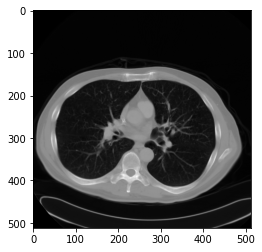

In [26]:
ct = dicom_file.pixel_array
print(type(ct))
print(ct.shape)
plt.figure()
# Alternatively cmap="bone"
plt.imshow(ct, cmap="gray")
# plt.imshow(ct, cmap="bone")
plt.show()

[PosixPath('data/DICOM/SE000001/MR000015'), PosixPath('data/DICOM/SE000001/MR000016'), PosixPath('data/DICOM/SE000001/MR000005'), PosixPath('data/DICOM/SE000001/MR000022'), PosixPath('data/DICOM/SE000001/MR000004'), PosixPath('data/DICOM/SE000001/MR000017'), PosixPath('data/DICOM/SE000001/MR000006'), PosixPath('data/DICOM/SE000001/MR000018'), PosixPath('data/DICOM/SE000001/MR000001'), PosixPath('data/DICOM/SE000001/MR000008'), PosixPath('data/DICOM/SE000001/MR000011'), PosixPath('data/DICOM/SE000001/MR000012'), PosixPath('data/DICOM/SE000001/MR000000'), PosixPath('data/DICOM/SE000001/MR000014'), PosixPath('data/DICOM/SE000001/MR000020'), PosixPath('data/DICOM/SE000001/MR000009'), PosixPath('data/DICOM/SE000001/MR000003'), PosixPath('data/DICOM/SE000001/MR000026'), PosixPath('data/DICOM/SE000001/MR000025'), PosixPath('data/DICOM/SE000001/MR000023'), PosixPath('data/DICOM/SE000001/MR000007'), PosixPath('data/DICOM/SE000001/MR000002'), PosixPath('data/DICOM/SE000001/MR000019'), PosixPath(

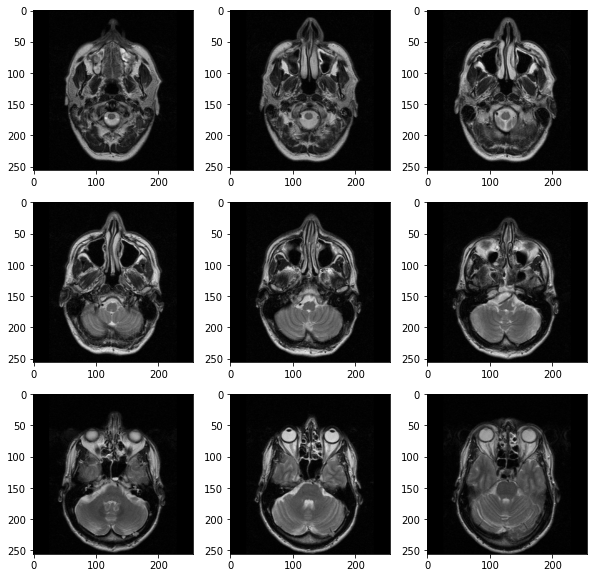

In [29]:
path_to_head_mri = Path("./data/DICOM/SE000001/")

all_files = list(path_to_head_mri.glob("*"))
print(all_files)
print(len(all_files))

mri_data = []
for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

# the slice locations are unordered and useless, so entire scan is shuffled and useless
print("Unordered slice location:")
for slice_loc in mri_data[:5]:
    print(slice_loc.SliceLocation)

# to make the slice locations ordered, we use sorted function of Python
print("Ordered slice location:")
mri_data_ordered = sorted(mri_data, key=lambda slice_loc: slice_loc.SliceLocation)
for slice_loc in mri_data_ordered[:5]:
    print(slice_loc.SliceLocation)


# extract the actual data
full_volume = []
print(type(mri_data_ordered))
for slices in mri_data_ordered:
    full_volume.append(slices.pixel_array)

# visualize
fig, axis = plt.subplots(3, 3, figsize=(10, 10))
slice_counter = 0
print(type(full_volume[slice_counter]))
print(full_volume[slice_counter].shape)

for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter], cmap="gray")
        slice_counter += 1

plt.show()

In [9]:
# automated ordering using simpleITK and reading dicom files without manual intervention
# in dicom files multiple scans are stored in a directory

import SimpleITK as sitk

In [10]:
path_to_head_mri = Path("./data/DICOM/SE000001/")
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
series_ids

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)

In [12]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri),
                                                                  series_ids[0])
# files are already sorted
# total 27 scans for size 256x256
series_file_names

('data/DICOM/SE000001/MR000000',
 'data/DICOM/SE000001/MR000001',
 'data/DICOM/SE000001/MR000002',
 'data/DICOM/SE000001/MR000003',
 'data/DICOM/SE000001/MR000004',
 'data/DICOM/SE000001/MR000005',
 'data/DICOM/SE000001/MR000006',
 'data/DICOM/SE000001/MR000007',
 'data/DICOM/SE000001/MR000008',
 'data/DICOM/SE000001/MR000009',
 'data/DICOM/SE000001/MR000010',
 'data/DICOM/SE000001/MR000011',
 'data/DICOM/SE000001/MR000012',
 'data/DICOM/SE000001/MR000013',
 'data/DICOM/SE000001/MR000014',
 'data/DICOM/SE000001/MR000015',
 'data/DICOM/SE000001/MR000016',
 'data/DICOM/SE000001/MR000017',
 'data/DICOM/SE000001/MR000018',
 'data/DICOM/SE000001/MR000019',
 'data/DICOM/SE000001/MR000020',
 'data/DICOM/SE000001/MR000021',
 'data/DICOM/SE000001/MR000022',
 'data/DICOM/SE000001/MR000023',
 'data/DICOM/SE000001/MR000024',
 'data/DICOM/SE000001/MR000025',
 'data/DICOM/SE000001/MR000026')

In [ ]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)
image_data = series_reader.Execute()
head_mri = sitk.GetArrayFromImage(image=image_data)
print(type(head_mri))
head_mri.shape

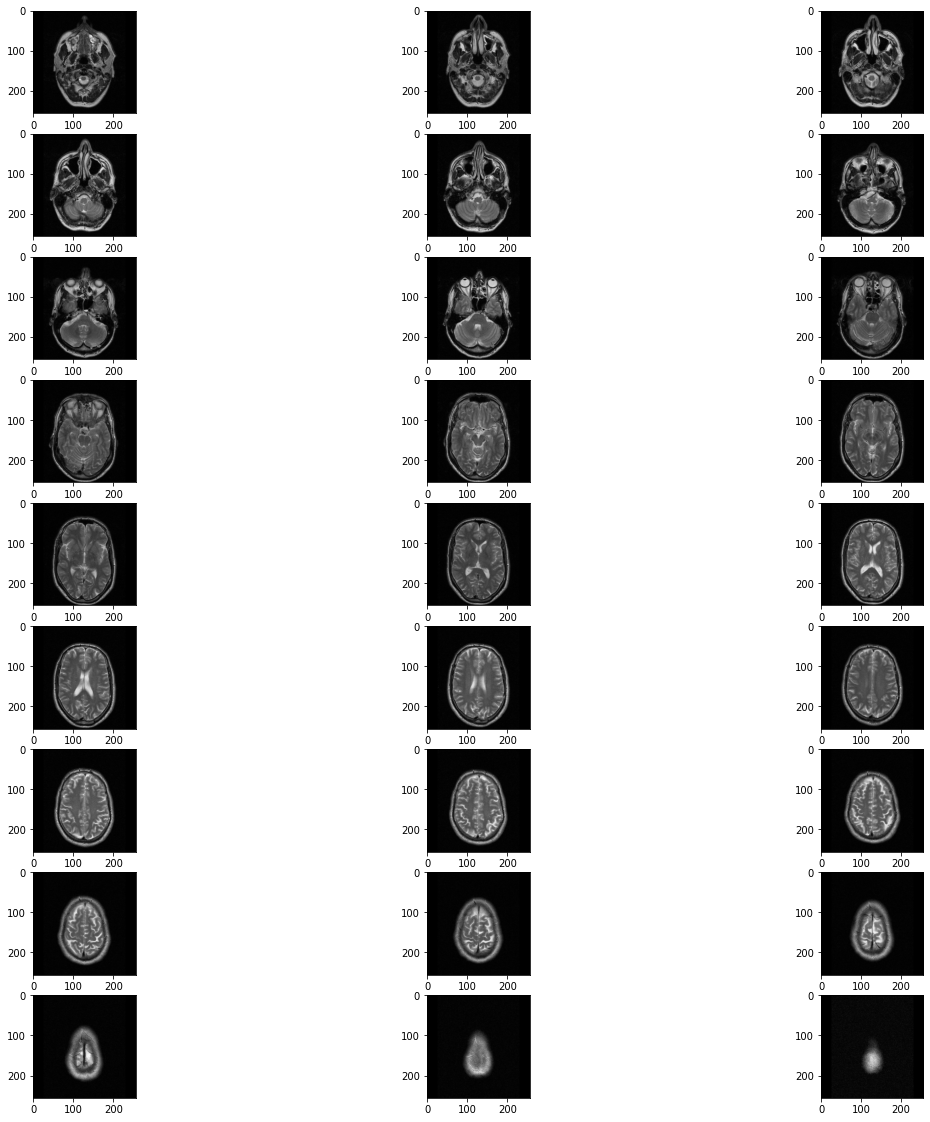

In [23]:
fig, axis = plt.subplots(9, 3, figsize=(20, 20))
slice_counter = 0
for i in range(9):
    for j in range(3):
        axis[i][j].imshow(head_mri[slice_counter], cmap="gray")
        slice_counter += 1

plt.show()